In [1]:
import pandas as pd
import numpy as np
import time
import joblib

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from quadratic_weighted_kappa import quadratic_weighted_kappa

from scipy.spatial.distance import pdist,squareform

import xgboost
import shap

In [2]:
x = joblib.load('essay_ngram_asap7')
x_i = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap7')
traits = joblib.load('df_essay7_traits_sum')
#x_normed = x_i / x_i.max(axis=0)
x_normed = (x_i-x_i.min(axis=0))/(x_i.max(axis=0)-x_i.min(axis=0))

## Find the essays with the nearest and farthest distance

### 1. Original features

### nearest essay-pair

#### MinMax

In [8]:
idx1 = 866
idx2 = 1254

In [9]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  19
The @CAPS1 @CAPS2 a few days after @CAPS18 began to run, @CAPS3, a small, anxious, chestnut room @CAPS1 saw her @CAPS5 plowing a large oval and covering it with @CAPS4 looked like dust. "@CAPS4's @CAPS5 doing, @CAPS6? " @CAPS7 a very curious @CAPS3. "@CAPS9's plowing." @CAPS10 @CAPS11, the young horses' @CAPS17. "@CAPS12's going to be in a race called the @ORGANIZATION1  next year and that's how @CAPS18 will practice." I want to race! "hollered @CAPS3 excitedly "Patience my darling, you're not even a filly! "@CAPS10 @CAPS11, conclusively. And so @CAPS3 waited patiently for weeks. When @CAPS18 could @CAPS18 ran the track at night. @CAPS18 counted her times and @CAPS18 got faster and stronger. Two years later @CAPS3 was the champion reached for @NUM1 years in a raw. "@CAPS17 was right! "@CAPS18 claimed "Patience is the key!
-------------------------------------------------------------------
Score :  8
Win i wenT @CAPS1 @CAPS2 @CAPS3. I  was in @CAPS4 and The @CAPS4 Was very @

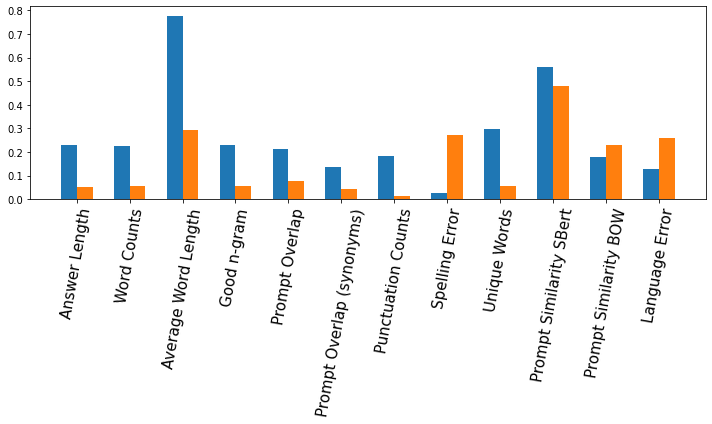

In [10]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [11]:
idx1 = 207
idx2 = 1073

In [12]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  17
One day we went @CAPS8 the mall me. Sharae. Reynal. Me and @PERSON1 wanted @CAPS8 @CAPS9 @CAPS8 @CAPS1 @CAPS2 but sharae wanted @CAPS8 @CAPS9 @CAPS8 pac sun so we were patient and let her @CAPS9 @CAPS8 that store. Then me & reynal wanted @CAPS8 @CAPS9 @CAPS8 @CAPS3 but sharae wanted @CAPS8 @CAPS9 @CAPS8 @CAPS4 so we were patient & let her @CAPS9. Then me & reynal wanted @CAPS8 @CAPS9 @CAPS8 @CAPS11 but sharae wanted @CAPS8 @CAPS9 @CAPS8 @ORGANIZATION1 until @CAPS5 we said..ENOUGH @CAPS6. WE @CAPS7 @CAPS8 @CAPS9 @CAPS8 @CAPS11!!! She said ok, ok, ok but can I just, no. Please, no, please. NO! Alright @CAPS12 well @CAPS9 @CAPS8 @CAPS11, I was just gonna ask @CAPS8 @CAPS9 @CAPS8 the bathroom.
-------------------------------------------------------------------
Score :  17
(waiting) (healt beatina ) @CAPS1 @CAPS2. @CAPS3 is your repolt cords. said @PERSON2hemlock. I @PERSON1 was the last one in line. @CAPS3 you go @PERSON1 @CAPS11 A@CAPS12, keepup the good work! said @PER

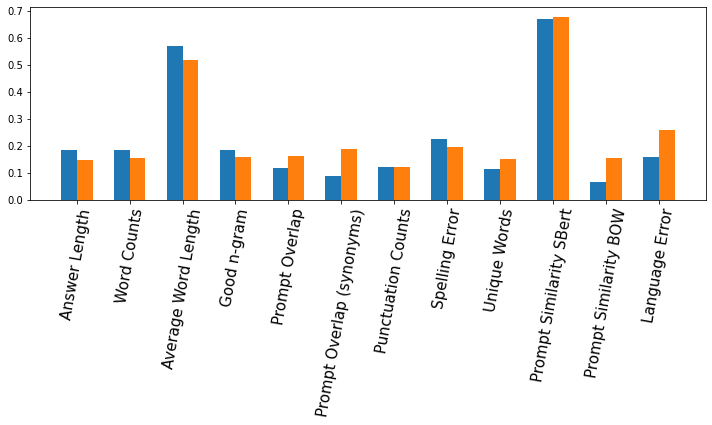

In [13]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [14]:
print("Score : ", traits.loc[3]['domain1_score'])
print(traits.loc[3]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[1064]['domain1_score'])
print(traits.loc[1064]['essay'])

Score :  17
I going to write about a time when I went to the @ORGANIZATION1 fair, we had fun, we saw a ride we wanted to get on, so we got in line. Suddenly, we noticed that we were at the end of the line. So my mother said. @CAPS1 get on another ride then. We already tried the other rides, my father said. So we stayed at the end of the line until it was our turn, and said that was the last ride, soon there were people behind us complaining, their younger children was getting mad, and parents was hollering. We just stood there, and kept being patient. That didnt desterb us. since we were raised to be patient, and wait our turn at things. I feel being patient is very important, because if you act up in line, you might make people think theyre holding you up, but its the line moving slow. Advice: when you are waiting at the end of the line, dont shout, scream, holler, or yell at anyone, it only creates trouble. Just dont think about all of the people ahead of you, talk to someone

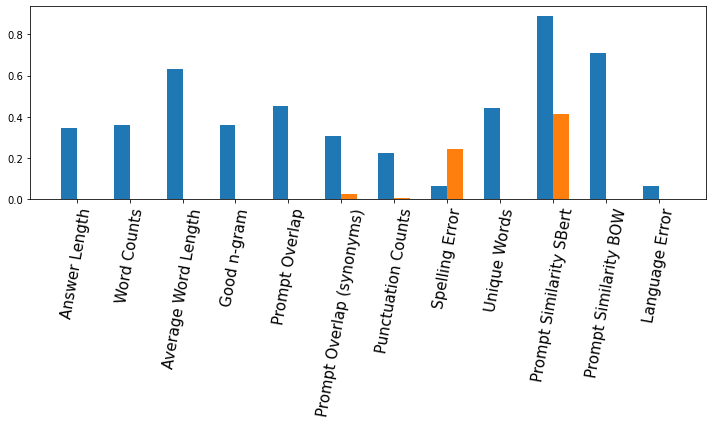

In [15]:
a = x_normed[3][:12]
b = x_normed[1064][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### 2. Original features normalized

### nearest essay-pair

#### MinMax

In [16]:
idx1 = 977
idx2 = 1161

In [17]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  21
Have you ever waited for something that seemed so @CAPS1 away, that seemed to take so @CAPS2 to get there, but in the end, it all paid off? I have, just @DATE1 I took the @CAPS3.A.T to get into the @CAPS4 @CAPS5 @CAPS6 @CAPS7, also know as @CAPS8, (@NUM1-@CAPS9) I had to wake up at @NUM2 am, on a @DATE2, to get ready. I had to beat @ORGANIZATION1 at @NUM3. When I got there, I had to wait in line for @NUM4 minutes to find out what room I would be taking the test in. It took @CAPS10 @CAPS11 to take the test! With three breaks! However, when I was done and exited my room engulfed in the crowd of about @NUM5 other kids taking the test, I met my mom who gave me encouraging smiles and big hugs. Since my three best friends also took the, we all got solo way afterwards and roamed the campus. It turned out to be a great day!
-------------------------------------------------------------------
Score :  5
One time i was pacent  it was the time I wanted a I-pod tuch. My grandma was bidd

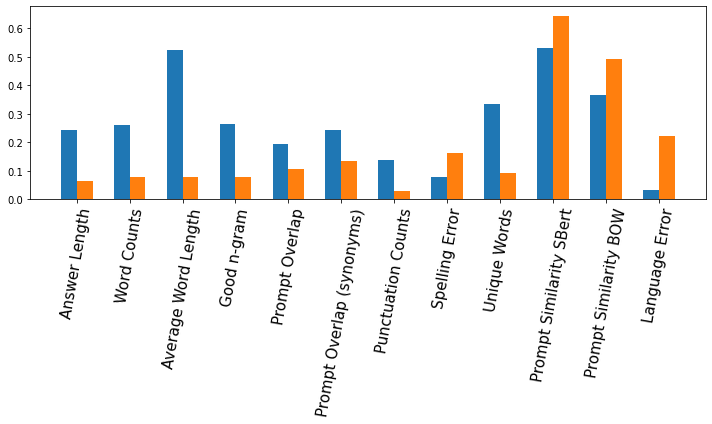

In [18]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [19]:
idx1 = 526
idx2 = 830

In [20]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  17
@CAPS1 on hurry up, my friend said. I know, be patient, I said. Being patient means that you are understanding and tolerant. A patient person experiences without complaining. One day, we had a basketball game away at a different school. My team and I all went to the bathroom. I was the last one to go into a stall. They all left and one girl stayed. Being patient is all ways a good thing have you ever heard something like Patience is a virtue? Well if you dont get used to it.
-------------------------------------------------------------------
Score :  17
Being patient means that you are understanding and tolerant. A patient person experiences difficulties without complaining. One time when I was patient is when my parents did not know it was a half day at school. One day in elementary school we had a half day which parents didnt know about. After school I waited in the parking lot for close to @NUM1 minutes waiting for my parents to pick me up. I was starting to think

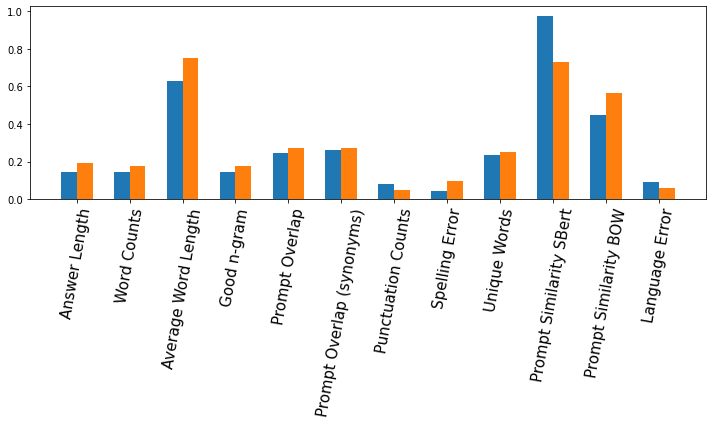

In [21]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [22]:
print("Score : ", traits.loc[3]['domain1_score'])
print(traits.loc[3]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[1064]['domain1_score'])
print(traits.loc[1064]['essay'])

Score :  17
I going to write about a time when I went to the @ORGANIZATION1 fair, we had fun, we saw a ride we wanted to get on, so we got in line. Suddenly, we noticed that we were at the end of the line. So my mother said. @CAPS1 get on another ride then. We already tried the other rides, my father said. So we stayed at the end of the line until it was our turn, and said that was the last ride, soon there were people behind us complaining, their younger children was getting mad, and parents was hollering. We just stood there, and kept being patient. That didnt desterb us. since we were raised to be patient, and wait our turn at things. I feel being patient is very important, because if you act up in line, you might make people think theyre holding you up, but its the line moving slow. Advice: when you are waiting at the end of the line, dont shout, scream, holler, or yell at anyone, it only creates trouble. Just dont think about all of the people ahead of you, talk to someone

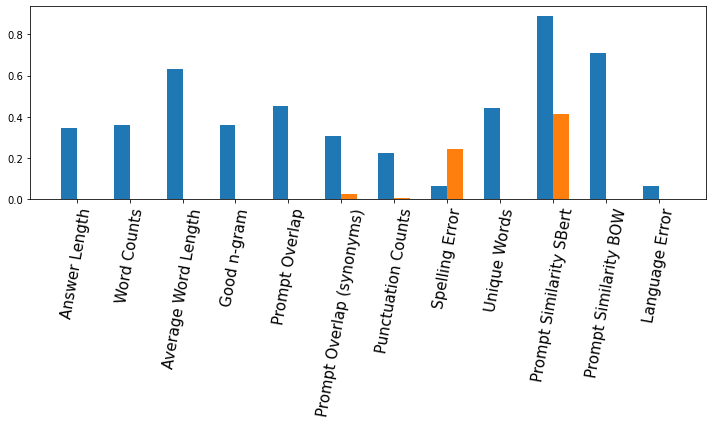

In [23]:
a = x_normed[3][:12]
b = x_normed[1064][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### 3. PCA

### nearest essay-pair

#### MinMax

In [24]:
idx1 = 88
idx2 = 771

In [25]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  24
Being patient as a kid is never really easy. I know lur lne being patient is like taking a baby's lollipop away from mom il just not pretty. But one time l really had to use my patience. Now it wasn't easy at all waiting in line at kings' island @NUM1 hours just to go on illegible. Socio. We waited about another @NUM2 minutes maybe @NUM3 minutes and yes! It started working again. So many people had left us was nicor because me line shortned some, but it was still probably going to be a long wait. It was nice when we got in the building because it was nice and air-conditioned. We sat around warning and waiting debating on wheiner or not. We wanted to stay or leave we ended up staying and waiting for which seemed like forever! Until we stepped into the space snottle. There was another room we had to go through to get to the ride. Finally. The out was over! Using my patience and waiting inline forever really payed off in the end. It was a great ride.
--------------------------

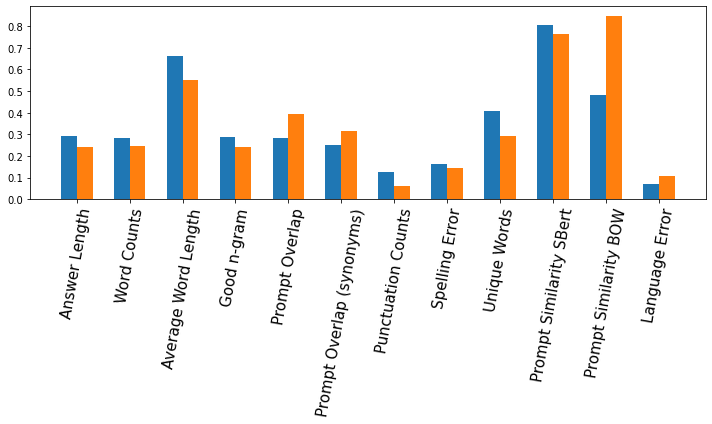

In [26]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [27]:
idx1 = 826
idx2 = 1343

In [28]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  13
One day when I was walking put side I found a snake on a rock. I yelled for my big brother who was playing his game. He said hold on I need to beat the leavie  but the snake was getting eratatid sot said, now garrid its leaving finally after ten minutes he came out of the house and stared at what was in my hand. He asked me why do you have a snake I re plied I saw it cool. he liked I and let it go.
-------------------------------------------------------------------
Score :  14
Sometimes its hard to be patient, especilly when you have to be tolerant to little kids. Well I have to do that sometimes, when I go to visit my little cousin, @ORGANIZATION1. @ORGANIZATION1 is eight years old and get on my nervers. She asks dumb questions and does stupid things and I don't like her at all. My mom says, "When you grow up, you two will be best friends," @CAPS1, right, I don't think so. When ever I visit her I just have to tolerant her and be patient. For now I have to deal with 

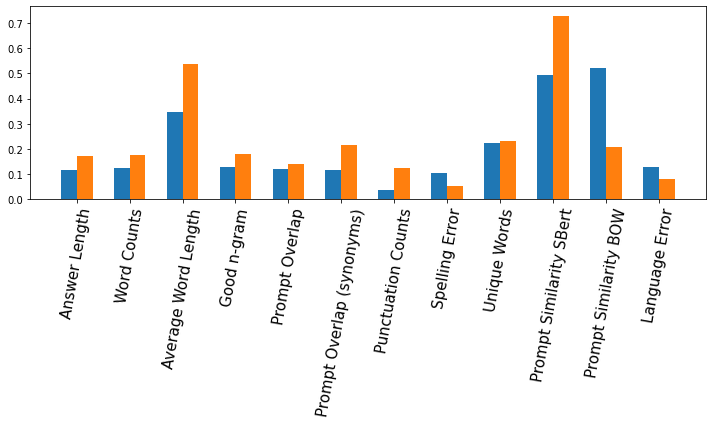

In [29]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [30]:
print("Score : ", traits.loc[536]['domain1_score'])
print(traits.loc[536]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[767]['domain1_score'])
print(traits.loc[767]['essay'])

Score :  8
I was patient geing my @NUM1. I took for ever to get it I had to be so patient getting the system. I took me ten mounts to get on my birthday he and to all the gamestops in taxlor to get it. I was in the car for hours to get we went in to one at the frist game stop we looked at and they had one insed it was in good condashi I got three games for it and that was the time  I was patient.
-------------------------------------------------------------------
Score :  20
Frezing cold and all I could do was wait, and wait, and wait. What I was waiting for was the @CAPS1 @DATE1 for @CAPS2 to start. I had friends with me but they mostly talk with themselves, leaving me and my friend @PERSON1. Her dirty blond hair whips her face, and @CAPS7 hunches her back against the wind. My yellow lab, @LOCATION1, @CAPS3 his leash and @PERSON1, being the one holding the leash, stumbles side ways. Are you sure you dont want me to take him? I ask for the tooth time. @CAPS4, I got it! @CAPS7 say

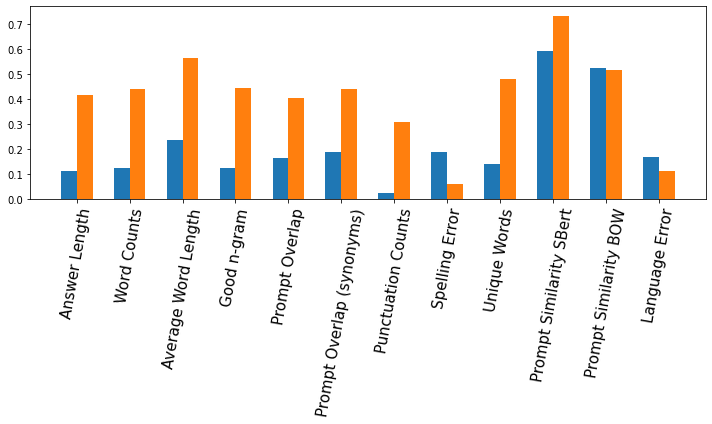

In [31]:
a = x_normed[536][:12]
b = x_normed[767][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### 4. t-SNE

### nearest essay-pair

#### MinMax

In [32]:
idx1 = 154
idx2 = 1052

In [33]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  15
When I was in fourth grade and I was going to a concert and I had to be very patient. I was waiting in a long line to get in. While I was in line I started talking to my friends we played games and walked a few steps up every a minutes. I sat there and walked up with my mom and sat down again and it was just seemed like the line wasnt moving at all! Finally we got up to the front and me and my friends were so excited. Being patient payed off because if I would have bothered my mom too much she might have gotten mat at me. I had a lot of fun after I got into then concert. That was a time that I was patient.
-------------------------------------------------------------------
Score :  13
One day me and my mom dad and sister were going to @LOCATION1 to go to unversual it is a attraction place. Me and my dad are walking he asking me if I want to go on this rollor coastor called the duling  dragons @CAPS1 I wasnt to sure about this because it was my first time on a rollor coast

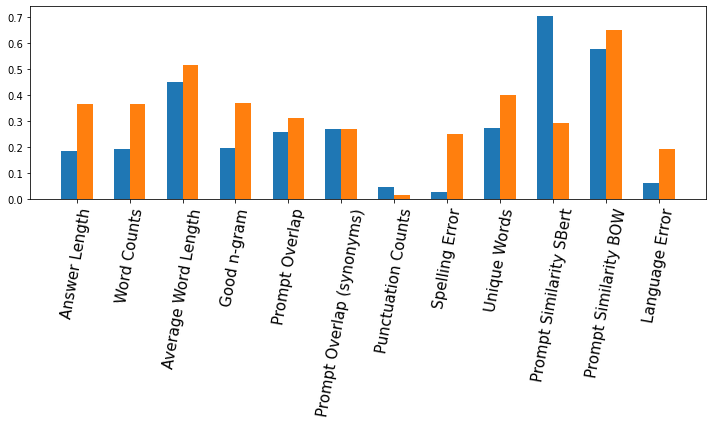

In [34]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [35]:
idx1 = 1366
idx2 = 1493

In [36]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  24
Clunk! I @CAPS1 in my seat as the rental car crashed into another pothole "look whose awake so my mom berked as annoying as possible. "You slept for long was though him might sleep until school that back up. "@CAPS2 are we" asked in a dreary voice. "ohio" replied my mom's friend @PERSON1. We were going to @LOCATION1 with my mom @PERSON1 and me @CAPS3 @PERSON2 over spring break. We would be staying in the florid @CAPS4. While we were there we would be visiting my dad as he was working in @CAPS4. I was going to be a memorable trip, but I knew the car ride there would be the ultimate test of my patience. It would take us @NUM1 or @NUM2 days to reach our destination. The @NUM3 day would be the hardest of there all. This was the day we would he driving through the mountains. I can usually pass the time when I am riding in the corners, the ?? the @CAPS5 ??. However when we reached the peak of the @NUM3 mountain, everything went hectic. First off, my @CAPS3 (who was sitting next t

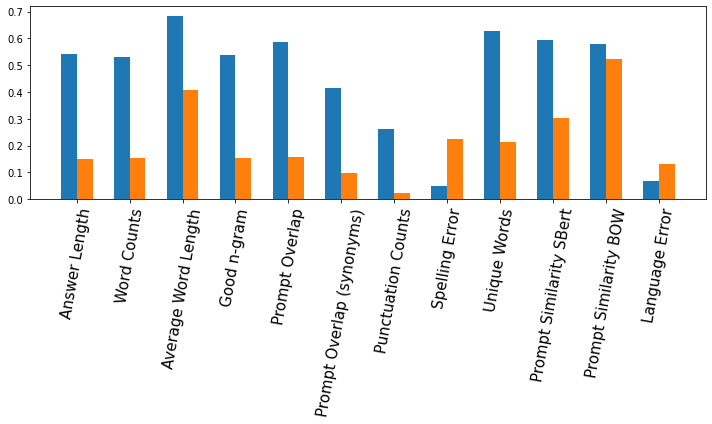

In [37]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [38]:
print("Score : ", traits.loc[83]['domain1_score'])
print(traits.loc[83]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[161]['domain1_score'])
print(traits.loc[161]['essay'])

Score :  24
I was patient for a whole @DATE1. Although, that was only because @CAPS2 mother had promised to purchase me a brand new video game system. This new video game system was the wii. For @CAPS5 had just come and had me interested the first time I saw @CAPS5. @CAPS5 was comoletely doctor and had advanced graphics.  I had informed  @CAPS2 mother about this system immediately.  "@CAPS1, I will buy @CAPS5 for you, considering your report card was exceptional." @CAPS2 mother had guarenteed me.  "@CAPS3! Thanc you mother," I had exclaimed excitedly. Now I was getting @CAPS2 hopes up and expecting @CAPS5 within  @CAPS6 weeks. Although I had done that only to later on dissapoint myself. @CAPS2 mother had informed us that I was to get @CAPS5 in between the time period of one to  the months. "@CAPS4 @CAPS5" I had shouted. " @CAPS6 months?"  "@CAPS3 @CAPS6 months I don't have enough time to thank about that stuff, there are more important things to consider," @CAPS2 mother explained. So t

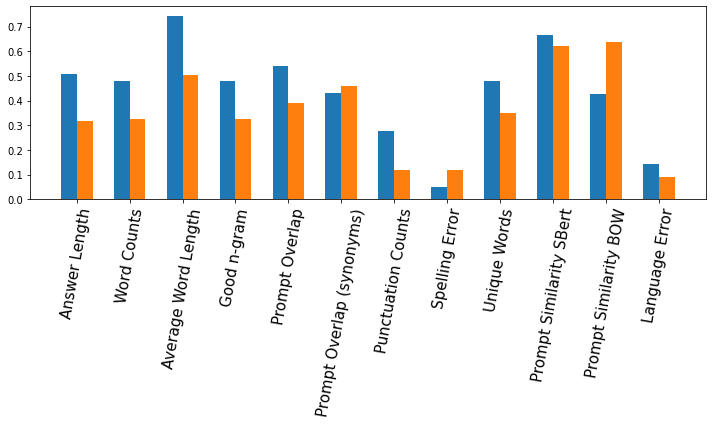

In [39]:
a = x_normed[83][:12]
b = x_normed[161][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### 5. UMAP

### nearest essay-pair

#### MinMax

In [40]:
idx1 = 34
idx2 = 199

In [41]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  18
One time when I was patient was when me and my family, went on a fishing trip to @LOCATION1, @CAPS1.  Once we got on the boat it took @NUM1 minutes to go through the river. Then at @NUM2 we just waited, trolling through the water. Rocking side to side like a baby in its crib. Setting up all the poles and tures. Then around @NUM3 we got our first hit. My dad rushed over to get the pole and started reaching as fast as he could. Eventually he got it in it was a, @ORGANIZATION1 at @MONEY1. Then around @NUM4, another pole got a hit I rushed over grabbed the pole and started realing it in. With some help my fish turned out to be a king @ORGANIZATION1 that came in at @NUM5. and @NUM6 inches tall. That is why it always helps to be patient. You never know  whats  going to happen if you are patient.
-------------------------------------------------------------------
Score :  14
The place I was paitent it was at my moms doctor appointment. It was a little healthcare place at @LOCATI

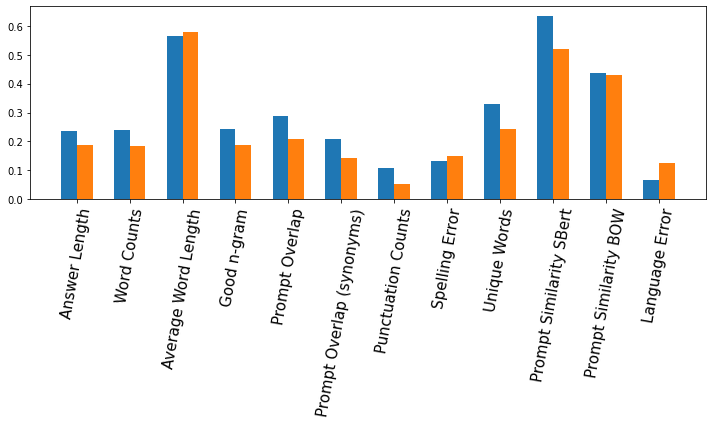

In [42]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [43]:
idx1 = 963
idx2 = 1333

In [44]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  10
A time I was begin patient was when I was in line to go se @CAPS1 @CAPS2 the line was so long I was dideing to leve but I did not whant to lose my place in line so when I got in the pace the line was longer than out side so I was patient so when I got in the movie was over I was so mad that I got home and whit to sleep.
-------------------------------------------------------------------
Score :  19
Patient can be a very hard thing for me to have at times. For example, when I go to resturaunts when we wait for our food I get board very easially. On time when I had a sore ankle from an injury in soccer. A couple months later, it still hurt in the same spot.@CAPS1 my mom set up an appointment with my doctor. When I did go to the doctor she felt for a lump or fracture in my ankle and said I dont think there is anything wrong, but we wont be sure. @CAPS1 she sent my mom and me to the urgent case out on @NUM1 with a note that said I needed an x-ray. After about a twenty five 

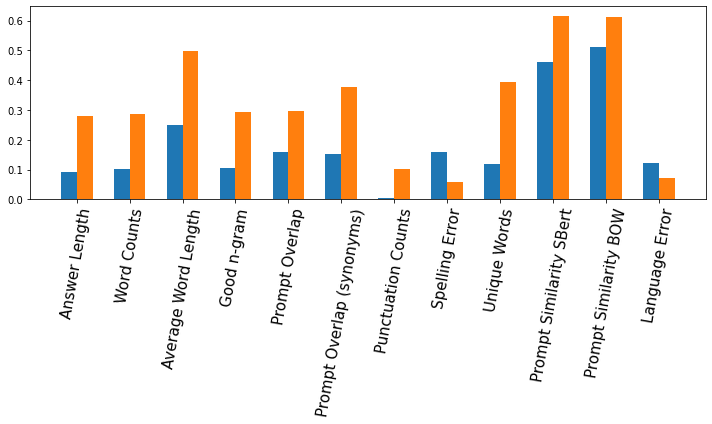

In [45]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [46]:
print("Score : ", traits.loc[639]['domain1_score'])
print(traits.loc[639]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[816]['domain1_score'])
print(traits.loc[816]['essay'])

Score :  20
One time my @CAPS3 planned a fishing trip to @LOCATION1. @CAPS8 @CAPS1t know. He told me to pack my suit case for three days worth of clothes I said why he said we are going to @LOCATION1 tomorrow with your causins @PERSON1 and ryan. I was so excited that I flew to my room and pounded cloths in my @CAPS2 and looked through everything I would need. I asked my @CAPS3 what we were doing there he said were going on a fishing trip in the @CAPS4 river for pike. The @CAPS5 @CAPS6 I got a new cherrywood fishing pole and a really nice underspin real. So I got my fishing poles ready packed my @CAPS7 and went to sleep so I could get up early. @NUM1 am come and my alarm went off I was so tierd I could barely see @CAPS8 we had to be at my uncles house at @NUM2 so I had to get ready. Once we got to my uncles house we met them then we all left. I wanted to sleep in the car @CAPS8 I couldnt once we got in @LOCATION1 it was so cool with the huge cliffs and hills we even sas a bear @CAPS10

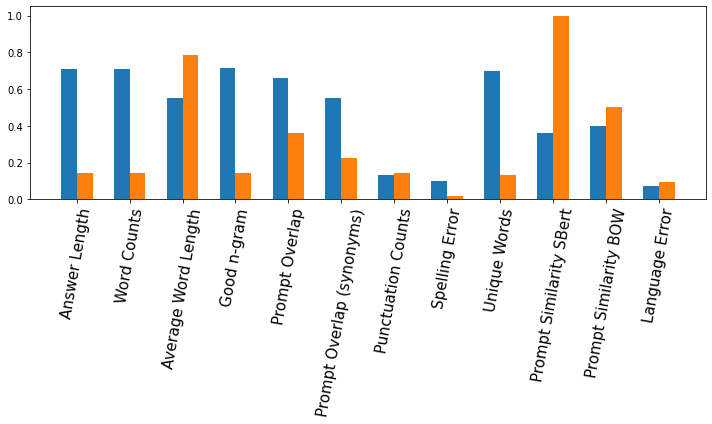

In [47]:
a = x_normed[639][:12]
b = x_normed[816][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### 6. Diffusion Map

### nearest essay-pair

#### MinMax

In [48]:
idx1 = 301
idx2 = 349

In [49]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  23
Middleton middle school, Im one of their students. My name is @CAPS1, Im new here, but you @MONTH1 think that Im a boy. Well if you do you better listen and listen hard @CAPS16 Im not going to say this twice; patience is a vurture. On my first day, I walked into @PERSON1s class I sat next to a girl with wavy blond hair, sparkling blue eyes, and a genuine smile. @CAPS2. @CAPS3 said. my names @CAPS4. @CAPS3 said in a perky voice. @CAPS2. I said back. Im @CAPS6, but you can call me @CAPS1. @CAPS8, uh @CAPS1. @CAPS4 replied. @CAPS11 let me show you around. @CAPS12! I answered back. @CAPS4 and I became fast friends,but when @CAPS3 introduced me to her friends they all made fun of me for having a boys name. @CAPS4 yelled at them, but I said @CAPS13 was @CAPS17. @CAPS4 just wouldent let @CAPS13 go. Finally I said to her, @CAPS13s @CAPS17 @CAPS4! Just let me handle this. @CAPS15? @CAPS3 asked crossing her arms and tapping her foot the way @CAPS3 did when

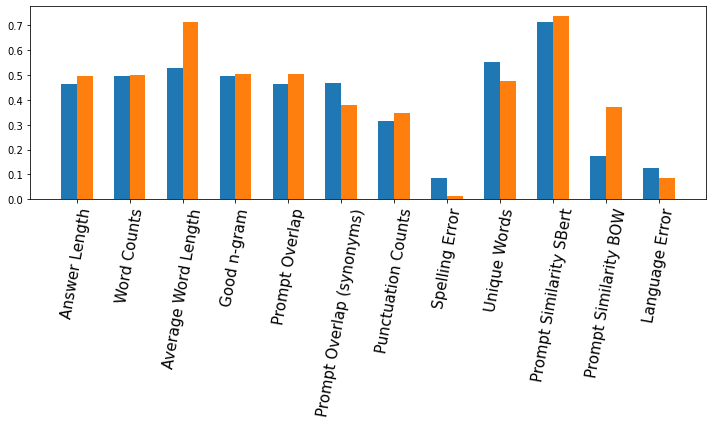

In [50]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

#### Max

In [51]:
idx1 = 1210
idx2 = 1483

In [52]:
print("Score : ", traits.loc[idx1]['domain1_score'])
print(traits.loc[idx1]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[idx2]['domain1_score'])
print(traits.loc[idx2]['essay'])

Score :  17
When im patient is mostly in the woods. This is when I am hunting. You have to be patient to wait for deer. They don't always come sometimes it could just be a fawn. Other  times it can be does. put when you see a buck ???is everything you first have to wait for it to come in close enough for a shot. When it does you have to wait to bring up your gun. Then you have to wait for a shot. If you get it you be patient and wait for it to die. If you cdnt find it right away dont give up. That is when I was patient.
-------------------------------------------------------------------
Score :  15
There are two reasons why I think patience is important. The first is because if you are not patient, than you can end up distracting other people around you. For example, if you finished your @CAPS1 test early and you kept telling everyone else to burry up its distracting. Now that youve interrupted everyone, they have lost their train of thought and now they @MONTH1 have to start over. A

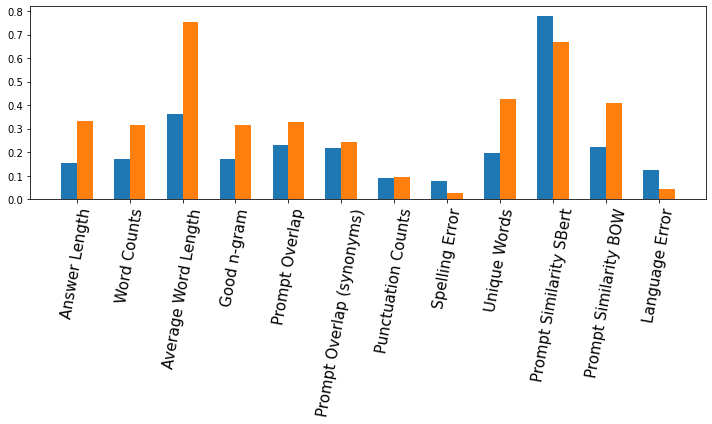

In [53]:
a = x_normed[idx1][:12]
b = x_normed[idx2][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

### farthest essay-pair

In [54]:
print("Score : ", traits.loc[576]['domain1_score'])
print(traits.loc[576]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[827]['domain1_score'])
print(traits.loc[827]['essay'])

Score :  21
My grandma is almost always patient with me, especially when she is teaching how to do something like cook or sew. One time my grandma taught me how to use a sewing machine. She taught me how to chang the color of the thread, and she helped me untangle the thread, even though it took a while and Im not the best listener, that took a lot of patience. Another time she taught me how to frost sugar cookies. I would get very invoked because either the cookie broke or my frosting was lumpy and all over the cookie even the bottom, but grandma put up with my complaining and when I finally frosted on that didnt break and the frosting was smooth, she praised me, even though I had probably broken half of the sugar cookies. My grandma was also patient with me when I helped her make carmol corn, which has many difficult steps, and if you one wrong, the whole batch is ruined. She let me do the easy stuff mostly, bat she also let me make the sauce on the last batch which was fun, and wh

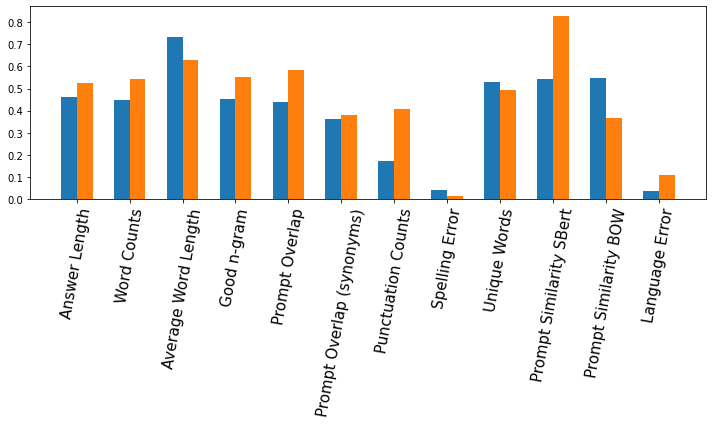

In [55]:
a = x_normed[576][:12]
b = x_normed[827][:12]

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center')
plt.bar(ind + width, b, width, align='center')

plt.xticks(ind + width / 2, feats, fontsize=15, rotation=80)
plt.tight_layout()
#plt.savefig('gb_best_20.png')
plt.show()

## Intrepretable Model

In [56]:
def get_feature_names_extended():
    ease_feats = ['Answer Length', 'Word Counts', 'Average Word Length', 'Good n-gram', 'Prompt Overlap', 
              'Prompt Overlap (synonyms)', 'Punctuation Counts', 'Spelling Error', 'Unique Words', 'Prompt Similarity SBert']        

    sbert_feats = []
    sbert_dim = 768

    for i in range(0, sbert_dim):
    	fname = "sbert_" + str(i) 
    	sbert_feats.append(fname)
    
    prompt_similarity_bow = ["Prompt Similarity BOW"]
    lang_error = ["Language Error"]
    
    feature_names = ease_feats + prompt_similarity_bow + lang_error + sbert_feats 
    #print("len feature names: ", len(feature_names))
    
    return feature_names

In [7]:
feature_names = get_feature_names_extended()
feats = feature_names[:12]